In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import sympy
from operator import itemgetter
from sympy.physics.quantum.cg import CG

In [2]:
%run Q_and_M_database.ipynb

Number of misbehaved entries:  1
Total number of entries analyzed:  1208
Total number of entries uncleaned:  1208
Total number of entries inserted:  1175
Long lived magnetic dipole moments loaded as M_LL
Extract data with the function extract_mu(D_F), deliver the dataframe D_F as argument. The return is a list [Z, A, mu, un].
Number of misbehaved entries:  65
Total number of entries analyzed:  1356
Total number of entries uncleaned:  1356
Total number of entries inserted:  1164
Short lived magnetic dipole moments loaded as M_SL
Extract data with the function extract_mu(D_F), deliver the dataframe D_F as argument. The return is a list [Z, A, q, un, E, jp].
Magnetic dipole moments loaded as M
Extract data with the function extract_mu(D_F), deliver the dataframe D_F as argument. The return is a list [Z, A, mu, un].
Total number of entries uncleaned:  2564
Total number of entries inserted:  2339
Number of misbehaved entries:  164
Total number of entries analyzed:  1468
Total number of entr

In [3]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import sympy
from operator import itemgetter

# Constants
hbar = 6.582119569*10**(-22)           # MeV*s
c = 2.99792458*10**(8)*10**(15)        # fm/s
m_p = 938.27/c**2                      # MeV*s²/fm²
m_n = 939.57/c**2                      # MeV*s²/fm²

def hbaromega(A):                          # Parameters: A mass number of nucleus
    return 45*A**(-1/3) - 25*A**(-2/3) 

def b(m,A):                                # Parameters: m mass of nucleon, A mass number of nucleus
    return hbar/np.sqrt(m*hbaromega(A))


# Harmonic oscillator radial wavefunction
def psiHO(r, n, l, m, A):                 # Parameters: r coordinate, n radial quantum number
                                          #             l orbital angular momentum,
                                          #             m mass of nucleon, A mass number of nucleus
    bv = b(m,A)
    norm = np.sqrt(2*scp.special.factorial(n)/(bv**3*scp.special.gamma(n+l+3/2)))
    return norm*(r/bv)**l*np.exp(-r**2/(2*bv**2))*scp.special.assoc_laguerre(r**2/bv**2, n, k = l+1/2)

# Function to compute matrix elements <r^2>
def Integrand(r,n1,n2,l,j,m,A,part):           # Parameters: r coordinate, n1, n2 radial quantum numbers, 
                                                 #             l orbital angular momentum, N number of neutrons,
                                                 #             Z number of protons, part = 0 for proton and 
                                                 #             1 for neutron, j total angular momentum
    f1 = psiHO(r, n1, l, m, A)
    
    return r**4*f1*f1

def MatrixElement(n1,n2,l,j,m,A,part):
    
    return scp.integrate.quad(Integrand, 0, 500, args=(n1,n2,l,j,m,A,part))[0]   # Integral up to 200fm

In [4]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import sympy
from operator import itemgetter

# Constants
hbar = 6.582119569*10**(-22)           # MeV*s
c = 2.99792458*10**(8)*10**(15)        # fm/s
m_p = 938.27/c**2                      # MeV*s²/fm²
m_n = 939.57/c**2                      # MeV*s²/fm²

def hbaromega(A):                          # Parameters: A mass number of nucleus
    return 45*A**(-1/3) - 25*A**(-2/3) 

def b(m,A):                                # Parameters: m mass of nucleon, A mass number of nucleus
    return hbar/np.sqrt(m*hbaromega(A))


# Harmonic oscillator radial wavefunction
def psiHO(r, n, l, m, A):                 # Parameters: r coordinate, n radial quantum number
                                          #             l orbital angular momentum,
                                          #             m mass of nucleon, A mass number of nucleus
    bv = b(m,A)
    norm = np.sqrt(2*scp.special.factorial(n)/(bv**3*scp.special.gamma(n+l+3/2)))
    return norm*(r/bv)**l*np.exp(-r**2/(2*bv**2))*scp.special.assoc_laguerre(r**2/bv**2, n, k = l+1/2)

# Function to compute matrix elements <r^2>
def Integrand(r,n1,n2,l,j,m,A,part):           # Parameters: r coordinate, n1, n2 radial quantum numbers, 
                                                 #             l orbital angular momentum, N number of neutrons,
                                                 #             Z number of protons, part = 0 for proton and 
                                                 #             1 for neutron, j total angular momentum
    f1 = psiHO(r, n1, l, m, A)
    
    return r**4*f1*f1

def MatrixElement(n1,n2,l,j,m,A,part):
    
    return scp.integrate.quad(Integrand, 0, 500, args=(n1,n2,l,j,m,A,part))[0]   # Integral up to 200fm

# Eq. 5.45 Takigawa. 5.10 Krane
def r2(A):
    return 3/5*1.2**2*A**(2/3)/100   # barns 

    
def Q_sp(j,A):
    return -(2*j-1)/(2*(j+1))*r2(A)

def Q_0_sp(j,A):
    return -(2*j+3)/(2*j)*r2(A)

def N(Z):
    return 0.910771*Z + 0.032701*(Z**(5/3))

def N(Z,a=1.00087173, b=0.00782601, c=1.9444715):
    return a*Z+b*Z**(c)

(array([-0.12068377,  0.87031862,  1.14682714]), array([[ 1.67706916, -1.49814798,  0.16214582],
       [-1.49814798,  1.33875489, -0.14496923],
       [ 0.16214582, -0.14496923,  0.01571109]]))
(array([0.19081656, 1.116165  , 0.81603995]), array([[ 0.07931367, -0.04314723, -0.02761441],
       [-0.04314723,  0.02464682,  0.01478835],
       [-0.02761441,  0.01478835,  0.00966145]]))


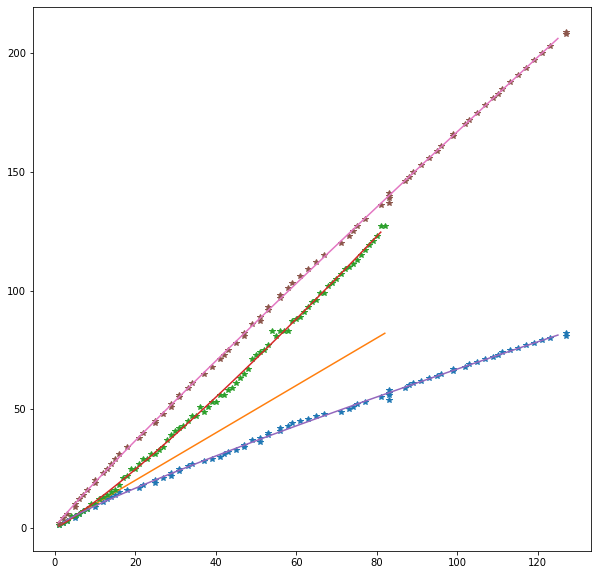

In [5]:
# Adjust N(Z) function

A=np.array([2,4,6,9,10,12,14,16,19,20,23,25,27,29,31,34,38,40,44,45,48,51,52,55,56,59,61,65,68,71,73,75,78,81,82,87,86,89,92,93,97,98,101,103,106,109,112,115,120,123,125,127,130,137,136,139,140,141,146,148,150,153,156,159,161,165,166,170,172,175,178,181,183,185,188,191,194,197,200,203,208,209])

stable_lists = [
np.arange(1,83,1),
A-np.arange(1,83,1)
]           
# [ Z , N ]

# Data for Z(N)

stable_lists_Z=[[ 1, 2,  3,  4,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 26, 27, 28, 29
, 30, 31, 32, 33, 34, 36, 37, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 59, 60
, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81],
[  1,2,3,5,6,7,8,10,12,13,14,15,16,18,21,22,25,27
,29,31,33,34,37,39,41,42,43,45,47,51,49,53,56,58,59,61
,63,65,67,71,73,74,75,77,83,81,87,88,89,91,93,95,96,99
,102,103,105,107,109,110,111,113,115,117,119,121,123,127]]

def NN(Ze,a,b,c):
    return a*Ze+b*Ze**(c)

def ZZ(Ne,a,b,c):
    return a*Ne+b*Ne**(c)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

print(curve_fit(N, stable_lists[0], stable_lists[1]))
print(curve_fit(ZZ, stable_lists_Z[1], stable_lists_Z[0]))


fig = plt.figure(figsize=(10,10))
plt.plot(stable_lists[1],stable_lists[0],"*")
plt.plot(np.arange(1,83,1), np.arange(1,83,1))
plt.plot(stable_lists[0],stable_lists[1],"*")
plt.plot(np.arange(1,82,1),NN(np.arange(1,82,1),-0.12068377,  0.87031862,  1.14682714))
plt.plot(np.arange(1,126,1),ZZ(np.arange(1,126,1),0.19081656, 1.116165  , 0.81603995))
plt.plot(A-np.arange(1,83,1), A,"*")
plt.plot(np.arange(1,126,1),np.arange(1,126,1)+ZZ(np.arange(1,126,1),0.19081656, 1.116165  , 0.81603995))

In [6]:
ZZ(126,0.19081656, 1.116165  , 0.81603995)

81.81452368298878

In [7]:
# Filtering for ground states only, odd-A
Q_dep = Q.copy()
Q_dep["A"] = pd.to_numeric(Q_dep["A"], downcast='integer', errors='coerce')
Q_dep= Q_dep[Q_dep["E(level)"]=="0"]
Q_dep = Q_dep[~Q_dep["I"].str.contains("or")]
Q_dep = Q_dep[~Q_dep["I"].str.contains(",")]
Q_dep_odd_A = Q_dep[Q_dep["A"]%2==1]
Q_dep_odd_A=Q_dep_odd_A.reset_index()#.drop("index", axis="column")
Q_dep_odd_A.loc[131, "I"] = "5/2+"   # Error in Stone table


######################################################################################
######################################################################################
#Q_dep_odd_A = Q_dep_odd_A[Q_dep_odd_A["Z"]<="89"]
######################################################################################
######################################################################################


dataqdep_odd = extract_q(Q_dep_odd_A, remove_unassigned="yes") # ONLY MEASUREMENTS WITH SIGN ARE USED

None of the available formats:


index                                             1135
Z                                                   91
Sym                                                 Pa
A                                                  231
E(level)                                             0
T_1/2                                         3.3x104y
I                                                 3/2-
Q(b)                                        [-1.72(5)]
Ref._Std.                                             
Method                                            from
NSR_Keynumber                                    B(E2)
Journal_reference    notmeasured1978Fr28PLA69225(1975)
Name: 401, dtype: object

In [8]:
Q_dep_odd_A

,index,Z,Sym,A,E(level),T_1/2,I,Q(b),Ref._Std.,Method,NSR_Keynumber,Journal_reference
0,2,3,Li,7,0,stable,3/2-,-0.0400(3),,MB,2008Py02,MolPhys1061965(2008)
1,4,3,Li,9,0,178ms,3/2-,-0.0304(2),[Li7],β-NMR,2011Av08,J Phys G 38 075102 (2011)
2,5,3,Li,11,0,8.75ms,3/2-,(-)0.0333(5),[Li7],β-NMR,2008Ne11,PRL 101 132502 (2008)
3,6,4,Be,9,0,stable,3/2-,+0.0529(4),,AB,1991Su05,CPL17791(1991)
4,10,5,B,11,0,stable,3/2-,+0.04059(10),,AB,2008Py02,MolPhys1061965(2008)
5,12,5,B,13,0,17.3ms,3/2-,(+)0.0365(8),[11B],β-NMR,2004Na38,NP A746 509c (2004)
6,14,5,B,15,0,9.9ms,3/2-,0.0379(11),[11B],β-NMR,1996Iz01,PL B366 51 (1996)
7,15,5,B,17,0,5.1ms,(3/2-),0.0385(15),[11B],β-NMR,2003Og03,PR C67 064308 (2003)
8,16,6,C,11,0,20.4m,3/2-,0.0333(2),,AB,2008Py02/1969Sc34,MolPhys1061965(2008)/PR181137(1969)
9,22,8,O,13,0,8..6ms,3/2-,0.0111(8),[17O],β-NQR,1999Ma46,PL B459 81 (1999)


In [9]:
# COnverting the spin values in floats
for j in range(len(dataqdep_odd[5])):
    
    dataqdep_odd[5][j]=dataqdep_odd[5][j].replace(")","").replace("+","").replace("-","").replace("(","").replace("[","").replace("]","")
    
    if "/" in dataqdep_odd[5][j]:
        num = int(dataqdep_odd[5][j].split("/")[0])
        den = int(dataqdep_odd[5][j].split("/")[1])
        dataqdep_odd[5][j]=float(num/den)
        
    else:
        dataqdep_odd[5][j] = int(dataqdep_odd[5][j])  
        
        
# Converting Q into Q_o along with the errors

for j in range(len(dataqdep_odd[2])):

    dataqdep_odd[2][j] = (dataqdep_odd[5][j]+1)*(2*dataqdep_odd[5][j]+3)/(dataqdep_odd[5][j]*(2*dataqdep_odd[5][j]-1))*dataqdep_odd[2][j] 
    dataqdep_odd[3][j] = (dataqdep_odd[5][j]+1)*(2*dataqdep_odd[5][j]+3)/(dataqdep_odd[5][j]*(2*dataqdep_odd[5][j]-1))*dataqdep_odd[3][j]
    

# Plot of ground states odd-A only $\frac{Q_0}{e\frac{2j+3}{2j}}$ 

In [10]:
# Phenomenological msr in barns
def msr(A):
    return 3/5*1.2**2*A**(2/3)/100

# Dependence on angular momentum
def ang_mom_dependence(j):
    return (2*j+3)/(2*j)

# Converting Q into Q_o along with the errors
dataqdep_odd_overj = dataqdep_odd.copy()

for j in range(len(dataqdep_odd_overj[2])):
    
    dataqdep_odd_overj[2][j] = dataqdep_odd_overj[2][j]/ang_mom_dependence(dataqdep_odd_overj[5][j])
    dataqdep_odd_overj[3][j] = dataqdep_odd_overj[3][j]/ang_mom_dependence(dataqdep_odd_overj[5][j])
    
#[Z, A, q, un, E, jp]

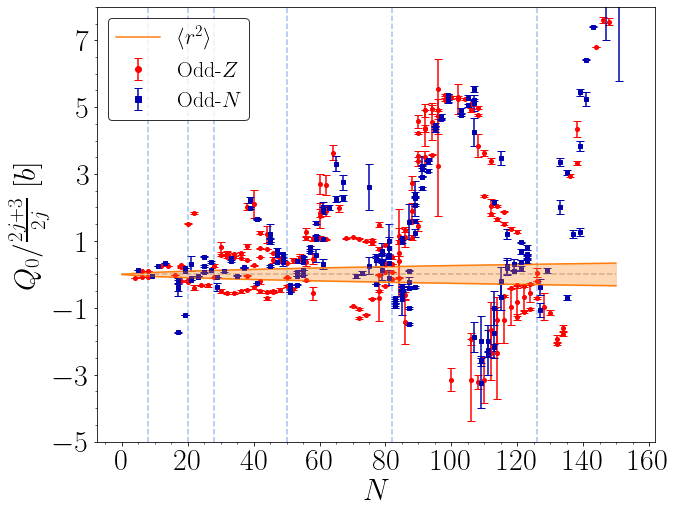

In [11]:
plt.figure(figsize=((10,8)))
plt.rcParams["text.usetex"] = True


from matplotlib import rcParams
plt.rcParams["font.family"] = "Liberation Sans"


# Error bars ======================================================================
lower_error = []
upper_error = []
for i in range(len(dataqdep_odd_overj[3])):
    try: 
        if len(dataqdep_odd_overj[3][i]) == 2:
            lower_error.append(dataqdep_odd_overj[3][i][1])
            upper_error.append(dataqdep_odd_overj[3][i][0])
    except: 
        lower_error.append(dataqdep_odd_overj[3][i])
        upper_error.append(dataqdep_odd_overj[3][i])
# =================================================================================        

# Odd Z
dataqdep_odd_overj_A_Z = [] 
dataqdep_odd_overj_A_N = [] 

dataqdep_odd_overj_mu_Z = [] 
dataqdep_odd_overj_lower_Z = [] 
dataqdep_odd_overj_upper_Z = [] 
#dataqdep_odd_overr2_E_Z = [] 
dataqdep_odd_overj_jp_Z = []

# Odd N
#dataqdep_odd_overr2_Z_N = [] 
#dataqdep_odd_overr2_A_N = [] 
dataqdep_odd_overj_mu_N = [] 
dataqdep_odd_overj_lower_N = [] 
dataqdep_odd_overj_upper_N = [] 
#dataqdep_odd_overr2_E_N = [] 
dataqdep_odd_overj_jp_N = []

for i in range(len(dataqdep_odd_overj[0])):
    
    if (dataqdep_odd_overj[0][i]%2==1):        
        jjpp = float(dataqdep_odd_overj[5][i])
        dataqdep_odd_overj_mu_Z.append(dataqdep_odd_overj[2][i])
        dataqdep_odd_overj_lower_Z.append(lower_error[i])
        dataqdep_odd_overj_upper_Z.append(upper_error[i])
        dataqdep_odd_overj_jp_Z.append(jjpp)
        dataqdep_odd_overj_A_Z.append(dataqdep_odd_overj[1][i] - dataqdep_odd_overj[0][i])
    
    if (dataqdep_odd_overj[0][i]%2==0):
        
        jjpp = float(dataqdep_odd_overj[5][i])
        dataqdep_odd_overj_mu_N.append(dataqdep_odd_overj[2][i])
        dataqdep_odd_overj_lower_N.append(lower_error[i])
        dataqdep_odd_overj_upper_N.append(upper_error[i])
        dataqdep_odd_overj_jp_N.append(jjpp)
        dataqdep_odd_overj_A_N.append(dataqdep_odd_overj[1][i] - dataqdep_odd_overj[0][i])

    
asymmetric_error_Z = np.array(list(zip(dataqdep_odd_overj_lower_Z, dataqdep_odd_overj_upper_Z))).T
plt.errorbar(dataqdep_odd_overj_A_Z, dataqdep_odd_overj_mu_Z, yerr=asymmetric_error_Z, fmt='o', color = "#FF0000" ,markersize=4, capsize=4, label="Odd-$Z$") 

asymmetric_error_N = np.array(list(zip(dataqdep_odd_overj_lower_N, dataqdep_odd_overj_upper_N))).T
plt.errorbar(dataqdep_odd_overj_A_N, dataqdep_odd_overj_mu_N, yerr=asymmetric_error_N, fmt='s', color = "#0000AF", markersize=4, capsize=4, label="Odd-$N$") 
plt.hlines(0, 0, 150, colors='gray', linestyles='--', alpha=0.5)


plt.vlines(8, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(20, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(28, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(50, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(82, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(126, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)

plt.ylim(-4,8)

plt.xticks(np.arange(0,170,20), fontsize=30)
plt.yticks(np.arange(-5, 8, 2), fontsize=30)


from matplotlib.ticker import AutoMinorLocator
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

c3 = "#ff7f0e"


#===========================================================================

proton_msr_range = np.arange(0,98,5)
neutron_msr_range = N(proton_msr_range)
A_msr_range = proton_msr_range + neutron_msr_range
Q_sp_msr_dep = msr(A_msr_range)

plt.plot(neutron_msr_range, Q_sp_msr_dep,"-", c=c3, label=r"$\langle r^2\rangle$ ")
plt.plot(neutron_msr_range, -1*np.array(Q_sp_msr_dep),"-", c=c3)

# Fill the area between the two curves
plt.fill_between(
    neutron_msr_range,
    Q_sp_msr_dep,
    -1*np.array(Q_sp_msr_dep),
    color=c3,
    alpha=0.3,   # transparency
    zorder=10
)

#===========================================================================

plt.xlabel("$N$", size=30)
plt.ylabel(r"$Q_0/\frac{2j+3}{2j}$ $[b]$", size=30)

plt.legend(fontsize=22, edgecolor="black", loc="upper left", markerscale=1.5)
plt.savefig("QExp-gs-odd-A-no-j-dep.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp-gs-odd-A-no-j-dep.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp-gs-odd-A-no-j-dep.pdf", facecolor='white', bbox_inches='tight')

plt.show()

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({
    "font.family": "Arial",
    "mathtext.rm": "Arial",
    "axes.linewidth": 1.5,       
    "xtick.major.width": 1.5,   
    "ytick.major.width": 1.5,
    "xtick.minor.width": 1.5,    
    "ytick.minor.width": 1.5,
    "xtick.major.size": 12,     
    "ytick.major.size": 12,
    "xtick.minor.size": 5,      
    "ytick.minor.size": 5
})

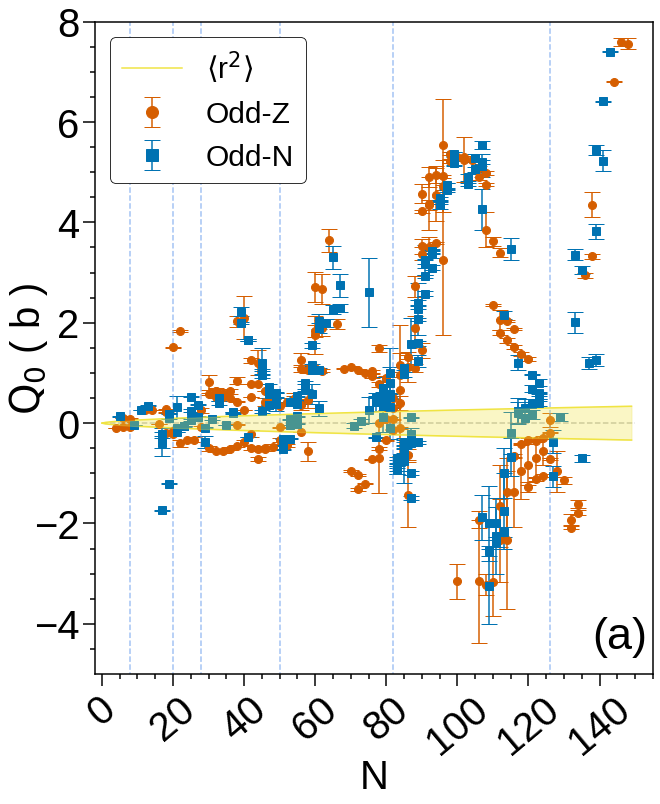

In [13]:
plt.figure(figsize=((10,12)))
plt.rcParams["text.usetex"] = False


from matplotlib import rcParams
plt.rcParams["font.family"] = "Liberation Sans"


# Error bars ======================================================================
lower_error = []
upper_error = []
for i in range(len(dataqdep_odd_overj[3])):
    try: 
        if len(dataqdep_odd_overj[3][i]) == 2:
            lower_error.append(dataqdep_odd_overj[3][i][1])
            upper_error.append(dataqdep_odd_overj[3][i][0])
    except: 
        lower_error.append(dataqdep_odd_overj[3][i])
        upper_error.append(dataqdep_odd_overj[3][i])
# =================================================================================        

# Odd Z
dataqdep_odd_overj_A_Z = [] 
dataqdep_odd_overj_A_N = [] 

dataqdep_odd_overj_mu_Z = [] 
dataqdep_odd_overj_lower_Z = [] 
dataqdep_odd_overj_upper_Z = [] 
#dataqdep_odd_overr2_E_Z = [] 
dataqdep_odd_overj_jp_Z = []

# Odd N
#dataqdep_odd_overr2_Z_N = [] 
#dataqdep_odd_overr2_A_N = [] 
dataqdep_odd_overj_mu_N = [] 
dataqdep_odd_overj_lower_N = [] 
dataqdep_odd_overj_upper_N = [] 
#dataqdep_odd_overr2_E_N = [] 
dataqdep_odd_overj_jp_N = []

for i in range(len(dataqdep_odd_overj[0])):
    
    if dataqdep_odd_overj[2][i] >8:
        continue
    
    if (dataqdep_odd_overj[0][i]%2==1):        
        jjpp = float(dataqdep_odd_overj[5][i])
        dataqdep_odd_overj_mu_Z.append(dataqdep_odd_overj[2][i])
        dataqdep_odd_overj_lower_Z.append(lower_error[i])
        dataqdep_odd_overj_upper_Z.append(upper_error[i])
        dataqdep_odd_overj_jp_Z.append(jjpp)
        dataqdep_odd_overj_A_Z.append(dataqdep_odd_overj[1][i] - dataqdep_odd_overj[0][i])
    
    if (dataqdep_odd_overj[0][i]%2==0):
        
        jjpp = float(dataqdep_odd_overj[5][i])
        dataqdep_odd_overj_mu_N.append(dataqdep_odd_overj[2][i])
        dataqdep_odd_overj_lower_N.append(lower_error[i])
        dataqdep_odd_overj_upper_N.append(upper_error[i])
        dataqdep_odd_overj_jp_N.append(jjpp)
        dataqdep_odd_overj_A_N.append(dataqdep_odd_overj[1][i] - dataqdep_odd_overj[0][i])
        
# D55E00
# 0072B2

    
asymmetric_error_Z = np.array(list(zip(dataqdep_odd_overj_lower_Z, dataqdep_odd_overj_upper_Z))).T
plt.errorbar(dataqdep_odd_overj_A_Z, dataqdep_odd_overj_mu_Z, yerr=asymmetric_error_Z, fmt='o', color = "#D55E00" ,markersize=8, capsize=8, label="Odd-Z") 

asymmetric_error_N = np.array(list(zip(dataqdep_odd_overj_lower_N, dataqdep_odd_overj_upper_N))).T
plt.errorbar(dataqdep_odd_overj_A_N, dataqdep_odd_overj_mu_N, yerr=asymmetric_error_N, fmt='s', color = "#0072B2", markersize=8, capsize=8, label="Odd-N") 
plt.hlines(0, 0, 150, colors='gray', linestyles='--', alpha=0.5)

plt.text(138, -4.5, "(a)", fontsize=45, zorder=40)
# x = [145, 155, 155, 145]
# y = [5, 5, 7.95, 7.95]
# plt.fill(x, y, color='white', edgecolor='white', linewidth=2,zorder=30)


plt.vlines(8, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(20, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(28, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(50, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(82, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)
plt.vlines(126, -9, 15, colors='#659bec', linestyles='--', alpha=0.6)

plt.ylim(-5,8)
plt.xlim(-2,155)

plt.xticks(np.arange(0,160,20), fontsize=40, rotation=40)
plt.yticks(np.arange(-4, 9, 2), fontsize=40)


from matplotlib.ticker import AutoMinorLocator
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

c3 = "#F0E442"

#===========================================================================

# proton_msr_range = np.arange(0,98,5)
# neutron_msr_range = N(proton_msr_range)
# A_msr_range = proton_msr_range + neutron_msr_range
# Q_sp_msr_dep = msr(A_msr_range)

# plt.plot(neutron_msr_range, Q_sp_msr_dep,"-", c=c3, label=r"$\langle $r$^2\rangle$ ")
# plt.plot(neutron_msr_range, -1*np.array(Q_sp_msr_dep),"-", c=c3)


proton_msr_range = np.arange(0,98,5)
neutron_msr_range = N(proton_msr_range)
A_msr_range = proton_msr_range + neutron_msr_range
Q_sp_msr_dep = msr(A_msr_range)


NeutronValues = np.arange(0,150,1)
A = NeutronValues + ZZ(NeutronValues,0.19081656, 1.116165  , 0.81603995)


plt.plot(NeutronValues, r2(A),"-", c=c3, label=r"$\langle $r$^2\rangle$ ")
plt.plot(NeutronValues, -1*r2(A),"-", c=c3)

# Fill the area between the two curves
plt.fill_between(
    NeutronValues,
    r2(A),
    -1*r2(A),
    color=c3,
    alpha=0.3,   # transparency
    zorder=10
)

#===========================================================================

plt.xlabel("N", size=40)
plt.ylabel(r"$\mathrm{Q}_0$ ( b )", size=40)

plt.gca().yaxis.set_label_coords(-0.08, 0.5)
plt.gca().xaxis.set_label_coords(0.5, -0.13)

#plt.legend(fontsize=28, edgecolor="black", loc="upper left", markerscale=1.5)
leg = plt.legend(fontsize=30, edgecolor="black", loc="upper left", markerscale=1.5)
frame = leg.get_frame()
frame.set_facecolor("white")   
frame.set_alpha(1.0)           
frame.set_edgecolor("black")   
frame.set_linewidth(0.8)
leg.set_zorder(1000)

plt.savefig("QExp-gs-odd-A-no-j-dep-cb.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp-gs-odd-A-no-j-dep-cb.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("QExp-gs-odd-A-no-j-dep-cb.pdf", facecolor='white', bbox_inches='tight')

plt.show()

In [14]:
print(dataqdep_odd_overj[2].index(min(dataqdep_odd_overj[2])) ) 
print(dataqdep_odd_overj[0][373])
print(dataqdep_odd_overj[1][373])
print(dataqdep_odd_overj[2][373])
print(dataqdep_odd_overj[3][373])
print(dataqdep_odd_overj[4][373])
print(dataqdep_odd_overj[5][373])
# [Z, A, q, un, E, jp]
#Outlier

373
91
233
-7.5
1.0
0.0
1.5


In [15]:
Q_dep_odd_A["Z"] = pd.to_numeric(Q_dep_odd_A["Z"])
Q_dep_odd_A["A"] = pd.to_numeric(Q_dep_odd_A["A"])


Q_dep_odd_A = Q_dep_odd_A[(Q_dep_odd_A["Z"]%1==0) & (Q_dep_odd_A["A"]%2==1)]

dataqdep_odd = extract_q(Q_dep_odd_A, remove_unassigned="yes") 

# [Z, A, q, un, E, jp]

None of the available formats:


index                                             1135
Z                                                   91
Sym                                                 Pa
A                                                  231
E(level)                                             0
T_1/2                                         3.3x104y
I                                                 3/2-
Q(b)                                        [-1.72(5)]
Ref._Std.                                             
Method                                            from
NSR_Keynumber                                    B(E2)
Journal_reference    notmeasured1978Fr28PLA69225(1975)
Name: 401, dtype: object

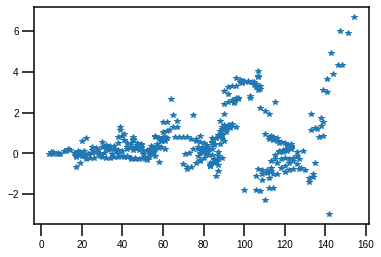

In [16]:
plt.plot(np.array(dataqdep_odd[1])-np.array(dataqdep_odd[0]), np.array(dataqdep_odd[2]),"*")

In [17]:
Q_dep_odd_A["Z"] = pd.to_numeric(Q_dep_odd_A["Z"])

Q_dep_odd_A = Q_dep_odd_A[Q_dep_odd_A["Z"]%2==0]

dataqdep_odd = extract_q(Q_dep_odd_A, remove_unassigned="yes") 

# [Z, A, q, un, E, jp]

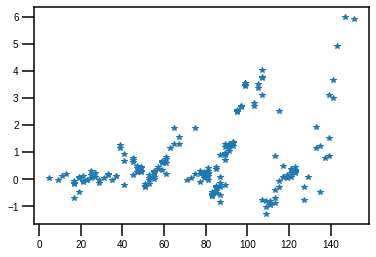

In [18]:
plt.plot(np.array(dataqdep_odd[1])-np.array(dataqdep_odd[0]), np.array(dataqdep_odd[2]),"*")

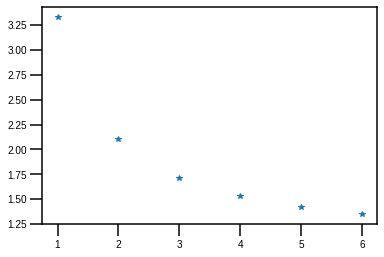

In [19]:
I=np.arange(1,13/2)
plt.plot(I, (2*I+3)*(I+1)/(I*(2*I+1)),"*")